In [235]:
import importlib
import sys
import os
sys.path.append(os.path.abspath("src"))
import normalizer
import neural_network
importlib.reload(neural_network)
from neural_network import NeuralNetwork
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

from activation_simulations import (
    train_architecture_with_activation_functions,
    visualize_results
)

import classification
importlib.reload(classification)
importlib.reload(neural_network)
from classification import *

In [2]:
def one_hot_encoding(Y, num_classes):
    one_hot = np.zeros((len(Y), num_classes))
    one_hot[np.arange(len(Y)), Y.flatten().astype(int)] = 1 
    return one_hot

#### rings3 regular dataset

In [248]:
rings_training_path='data/rings3-regular-training.csv'
rings_test_path='data/rings3-regular-test.csv'

X_train_rings, Y_train_rings, X_test_rings, Y_test_rings, num_classes =load_data_classification(rings_training_path, rings_test_path, encoding=True)

X_train_rings[:4], Y_train_rings[:4]

(array([[-93.56331718, -76.34510961],
        [  1.06011368, -16.72703996],
        [ 24.39609924,  40.35882219],
        [-94.59513663, -97.88924977]]),
 array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]]))

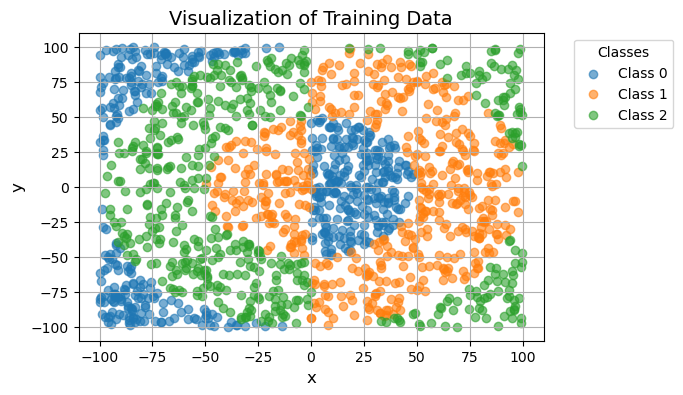

In [238]:
visualize_data_classification(X_train_rings, Y_train_rings, num_classes=num_classes)

Epoch 0, Training Loss: 1.196740, Test Loss: 1.056230
Epoch 100, Training Loss: 0.096346, Test Loss: 0.102090
Epoch 200, Training Loss: 0.054735, Test Loss: 0.067673
Epoch 300, Training Loss: 0.055767, Test Loss: 0.071605
Epoch 400, Training Loss: 0.063420, Test Loss: 0.079255
Epoch 500, Training Loss: 0.051627, Test Loss: 0.076068
Epoch 600, Training Loss: 0.057164, Test Loss: 0.070544
Epoch 700, Training Loss: 0.037157, Test Loss: 0.049826
Epoch 800, Training Loss: 0.038386, Test Loss: 0.056485
Epoch 900, Training Loss: 0.065871, Test Loss: 0.095736
Epoch 1000, Training Loss: 0.071034, Test Loss: 0.093652
Epoch 1100, Training Loss: 0.058489, Test Loss: 0.087080
Epoch 1200, Training Loss: 0.048714, Test Loss: 0.066616
Epoch 1300, Training Loss: 0.078788, Test Loss: 0.097651
Epoch 1400, Training Loss: 0.047129, Test Loss: 0.073842
Epoch 1500, Training Loss: 0.047885, Test Loss: 0.053713
Epoch 1600, Training Loss: 0.029023, Test Loss: 0.047207
Epoch 1700, Training Loss: 0.026607, Test L

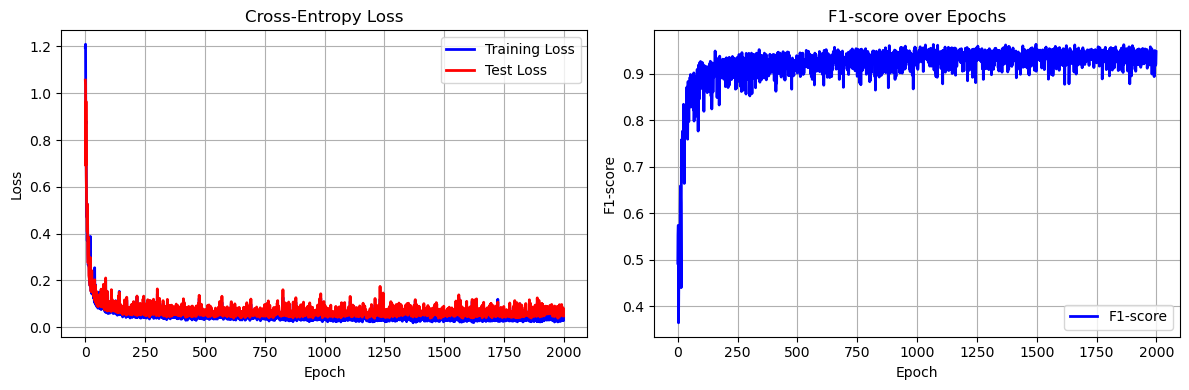

Fscore on test set: 0.947


In [47]:
nn_rings=NeuralNetwork(layers=[2, 10, 10, num_classes], task="classification", activation="relu", weights_initialize="He")
nn_rings.train(X_train_rings, Y_train_rings, X_test_rings, Y_test_rings, optimizer="RMSprop",
               learning_rate=0.01, epochs=2000, verbose_interval=100, batch_size=32)
print(f"Fscore on test set: {nn_rings.Fscore(X_test_rings, Y_test_rings)}")

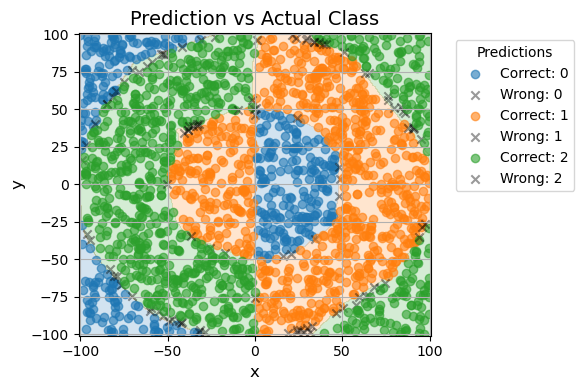

In [48]:
Y_pred=nn_rings.predict(X_test_rings)
visualize_predictions_classification(nn_rings, X_test_rings, Y_test_rings, Y_pred, num_classes)

In [240]:
activations=['linear','sigmoid', 'tanh', 'relu']
#defining model parameters
task = 'classification'
layers = [2, 10, 10, num_classes]
epochs = 2000
batch_size = 32
learning_rate = 0.01
optimizer = 'RMSprop'
results = train_architecture_with_activation_functions(activations=activations, task=task, layers=layers, epochs=epochs, 
                                             batch_size=batch_size, learning_rate=learning_rate, optimizer=optimizer,
                                             X_train=X_train_rings, Y_train=Y_train_rings,
                                             X_test=X_test_rings, Y_test=Y_test_rings)

Training architecture with linear
Training architecture with sigmoid
Training architecture with tanh
Training architecture with relu


Architecture with layers: [2, 10, 10, 3]


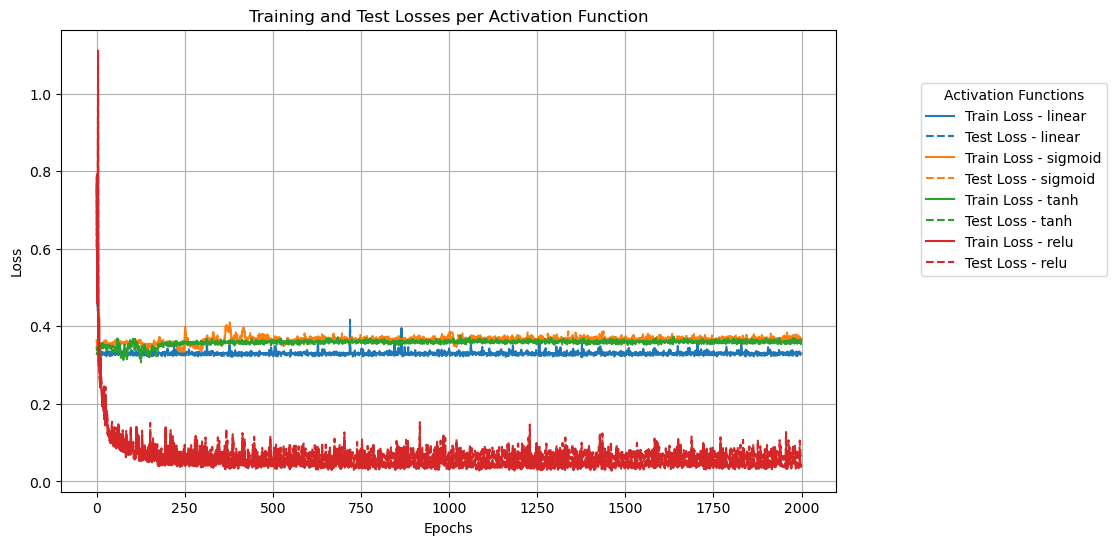

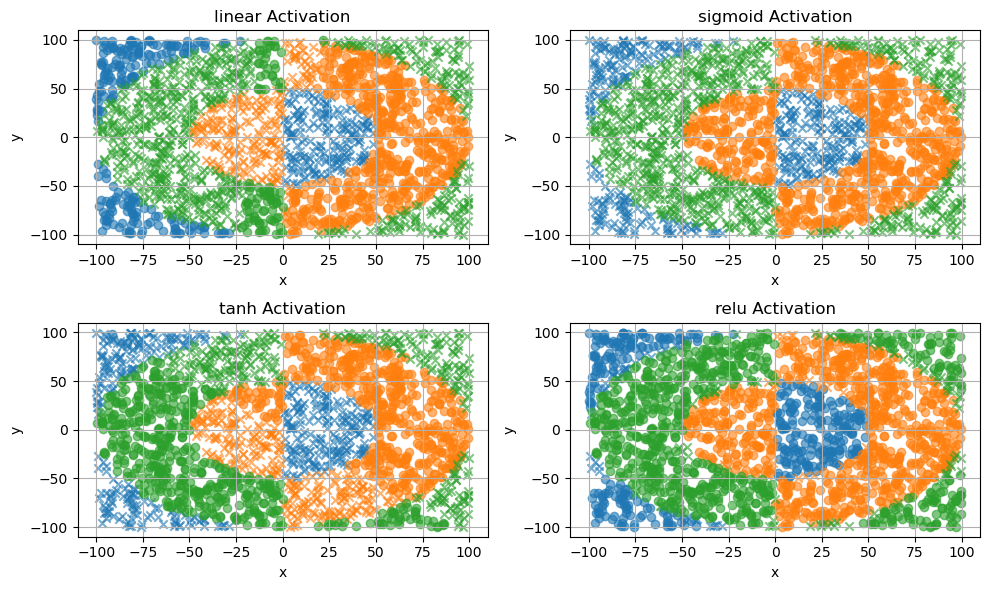

Classification Task Evaluation Metric per Activation Function


,Activation Function,Classification Task Eval Metric (Fscore)
0,linear,0.43
1,sigmoid,0.38
2,tanh,0.51
3,relu,0.92


Training Time per Activation Function


,Activation Function,Training Time (seconds)
0,linear,19.83
1,sigmoid,26.75
2,tanh,24.14
3,relu,20.9


In [241]:
print(f"Architecture with layers: {layers}")
visualize_results(results=results, task="classification", X_test=X_test_rings, Y_test=Y_test_rings, num_classes=num_classes)

#### easy dataset

In [53]:
easy_training_path='data/easy-training.csv'
easy_test_path='data/easy-test.csv'

X_train_easy, Y_train_easy, X_test_easy, Y_test_easy, num_classes =load_data_classification(easy_training_path, easy_test_path, encoding=True)
X_train_easy[:4], Y_train_easy[:4]

(array([[-72.82946124, -40.2393911 ],
        [-65.4643958 , -60.50151605],
        [ 14.38958854,  74.22399377],
        [-92.3356276 ,  17.46691559]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]]))

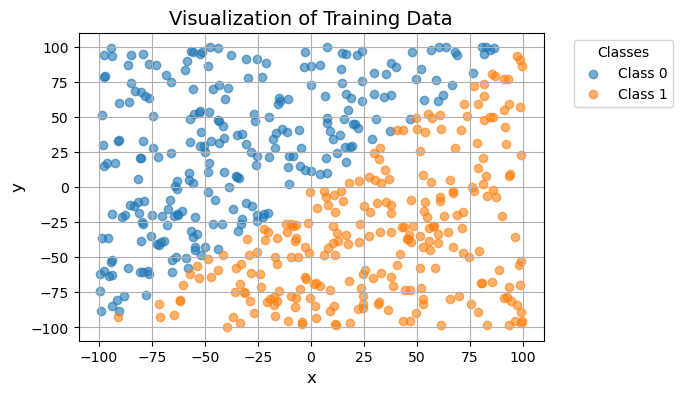

In [54]:
visualize_data_classification(X_train_easy, Y_train_easy, num_classes)

Epoch 0, Training Loss: 0.345408, Test Loss: 0.340198
Epoch 100, Training Loss: 0.180828, Test Loss: 0.177357
Epoch 200, Training Loss: 0.121487, Test Loss: 0.117844
Epoch 300, Training Loss: 0.124416, Test Loss: 0.126744
Epoch 400, Training Loss: 0.170924, Test Loss: 0.170493
Epoch 500, Training Loss: 0.113673, Test Loss: 0.116316
Epoch 600, Training Loss: 0.094880, Test Loss: 0.097122
Epoch 700, Training Loss: 0.061711, Test Loss: 0.063995
Epoch 800, Training Loss: 0.033234, Test Loss: 0.031250
Epoch 900, Training Loss: 0.021772, Test Loss: 0.022824


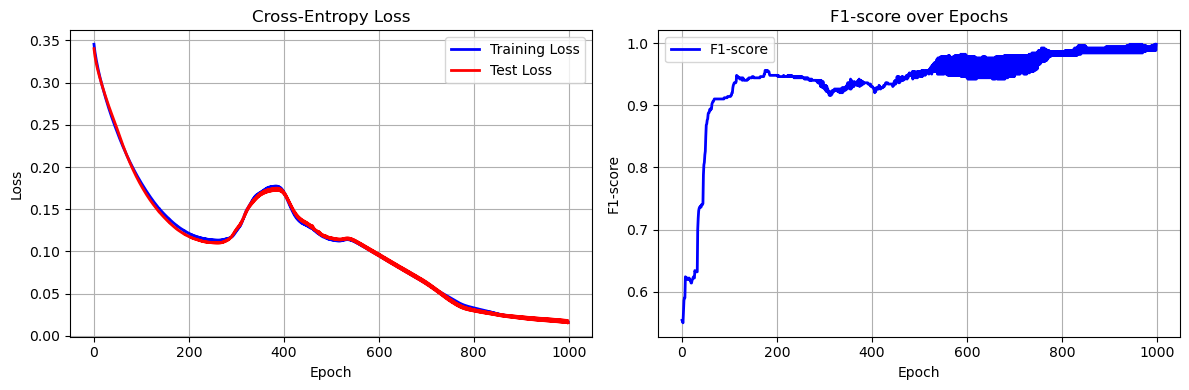

Fscore on test set: 0.998


In [55]:
nn_easy=NeuralNetwork(layers=[2, 10, num_classes], task="classification", activation="tanh", weights_initialize="Xavier")
nn_easy.train(X_train_easy, Y_train_easy, X_test_easy, Y_test_easy, optimizer="RMSprop",
               learning_rate=0.001, epochs=1000, verbose_interval=100, batch_size=None)
print(f"Fscore on test set: {nn_easy.Fscore(X_test_easy, Y_test_easy)}")

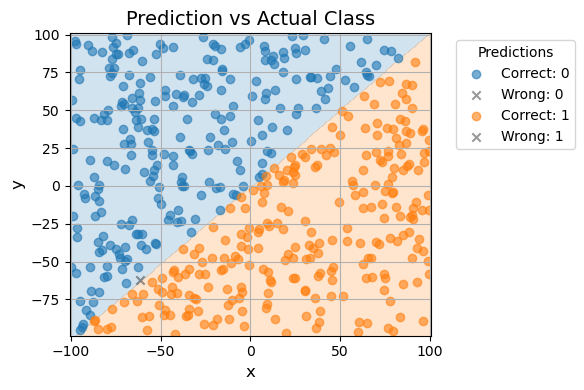

In [56]:
Y_pred=nn_easy.predict(X_test_easy)
visualize_predictions_classification(nn_easy,X_test_easy, Y_test_easy, Y_pred, num_classes)

#### xor3 dataset

In [243]:
xor_training_path='data/xor3-training.csv'
xor_test_path='data/xor3-test.csv'

X_train_xor, Y_train_xor, X_test_xor, Y_test_xor, num_classes =load_data_classification(xor_training_path, xor_test_path, encoding=True)
X_train_xor[:4], Y_train_xor[:4]

(array([[ -5.72031611,  18.19865257],
        [ 50.03941883, -71.39036045],
        [ 93.07278106, -76.34025584],
        [ 10.43410017, -21.86327162]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]]))

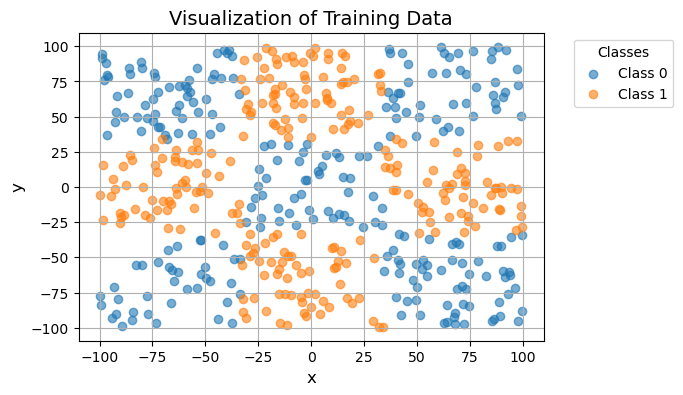

In [204]:
visualize_data_classification(X_train_xor, Y_train_xor, num_classes)

In [ ]:
scaler_X = MinMaxScaler()
X_train_xor_normalized = scaler_X.fit_transform(X_train_xor)
X_test_xor_normalized = scaler_X.transform(X_test_xor)

Epoch 0, Training Loss: 4.262553, Test Loss: 3.774484
Epoch 1000, Training Loss: 0.023590, Test Loss: 0.120888
Epoch 2000, Training Loss: 0.009759, Test Loss: 0.194997
Early stopping due to no improvment in test loss after 2000 epochs


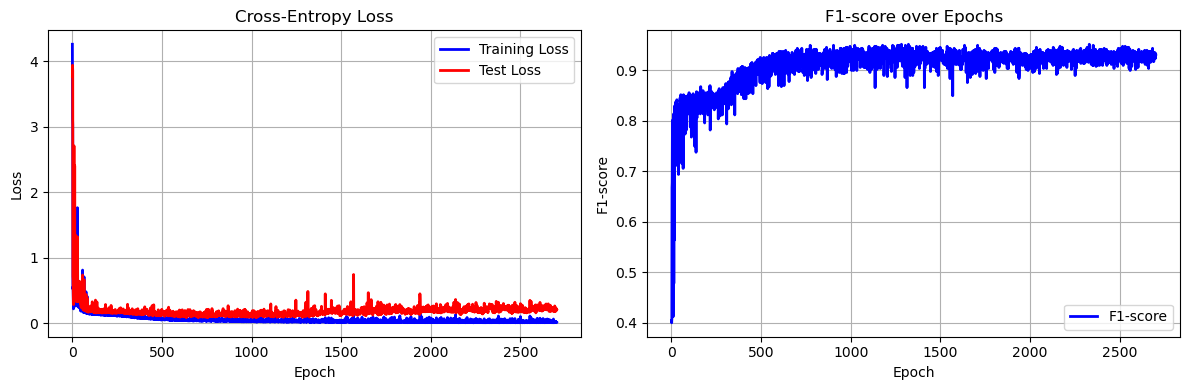

Fscore on test set: 0.94


In [212]:
nn_xor=NeuralNetwork(layers=[2, 20, 20, num_classes], task="classification", 
                     activation="relu", weights_initialize="He")
nn_xor.train(X_train_xor, Y_train_xor, X_test_xor, Y_test_xor, optimizer="RMSprop", beta=0.9,
               learning_rate=0.01, epochs=50000, verbose_interval=1000, batch_size=128, early_stopping=True, patience=2000)
print(f"Fscore on test set: {nn_xor.Fscore(X_test_xor, Y_test_xor):.2f}")


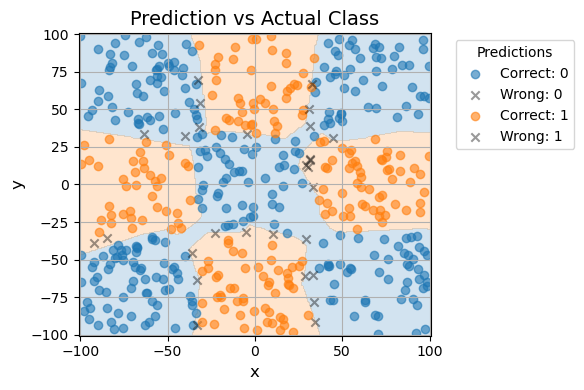

In [213]:
Y_pred=nn_xor.predict(X_test_xor)
visualize_predictions_classification(nn_xor ,X_test_xor, Y_test_xor, Y_pred, num_classes)

Epoch 0, Training Loss: 0.350806, Test Loss: 0.340540
Epoch 5000, Training Loss: 0.259787, Test Loss: 0.264449
Epoch 10000, Training Loss: 0.085051, Test Loss: 0.107211
Epoch 15000, Training Loss: 0.050826, Test Loss: 0.061733
Epoch 20000, Training Loss: 0.037620, Test Loss: 0.053690
Epoch 25000, Training Loss: 0.026001, Test Loss: 0.050349
Epoch 30000, Training Loss: 0.020151, Test Loss: 0.050689
Epoch 35000, Training Loss: 0.016941, Test Loss: 0.053263
Epoch 40000, Training Loss: 0.014663, Test Loss: 0.057939
Epoch 45000, Training Loss: 0.012896, Test Loss: 0.064503


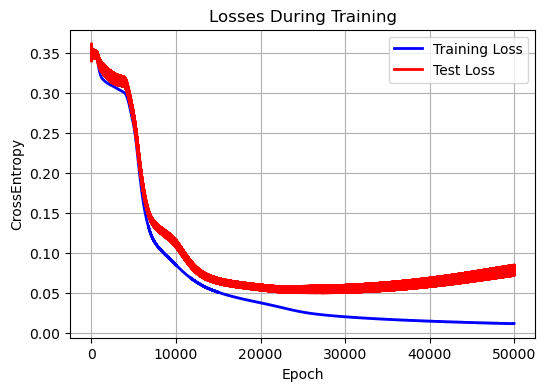

In [9]:
nn_xor=NeuralNetwork(layers=[2,20,num_classes], task="classification", 
                     activation="sigmoid", weights_initialize="Xavier")
nn_xor.train(X_train_xor_normalized, Y_train_xor, X_test_xor_normalized, Y_test_xor, optimizer="RMSprop", 
               learning_rate=0.01, epochs=50000, verbose_interval=5000, batch_size=None)

overfit

Epoch 0, Training Loss: 0.350483, Test Loss: 0.361119
Epoch 5000, Training Loss: 0.150077, Test Loss: 0.195856
Epoch 10000, Training Loss: 0.044083, Test Loss: 0.111525
Epoch 15000, Training Loss: 0.034344, Test Loss: 0.134632


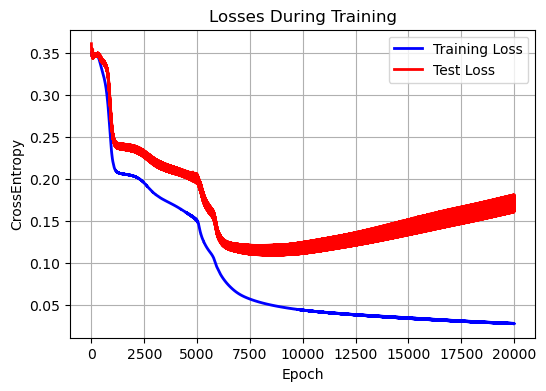

In [16]:
nn_xor=NeuralNetwork(layers=[2,5,5,num_classes], task="classification", 
                     activation="sigmoid", weights_initialize="Xavier")
nn_xor.train(X_train_xor_normalized, Y_train_xor, X_test_xor_normalized, Y_test_xor, optimizer="RMSprop", 
               learning_rate=0.01, epochs=20000, verbose_interval=5000, batch_size=None)

overfit

Epoch 0, Training Loss: 0.361215, Test Loss: 0.339666
Epoch 5000, Training Loss: 0.191039, Test Loss: 0.196203
Epoch 10000, Training Loss: 0.094090, Test Loss: 0.097646
Epoch 15000, Training Loss: 0.064896, Test Loss: 0.071007
Epoch 20000, Training Loss: 0.044339, Test Loss: 0.054018
Epoch 25000, Training Loss: 0.033285, Test Loss: 0.049511


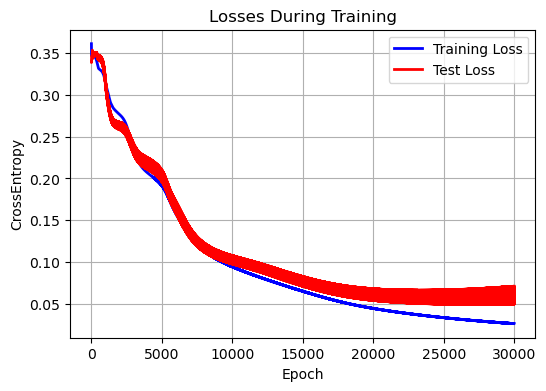

In [23]:
nn_xor=NeuralNetwork(layers=[2,5,5,num_classes], task="classification", 
                     activation="sigmoid", weights_initialize="Xavier")
nn_xor.train(X_train_xor_normalized, Y_train_xor, X_test_xor_normalized, Y_test_xor, optimizer="RMSprop", 
               learning_rate=0.01, epochs=30000, verbose_interval=5000, batch_size=None)

In [ ]:
nn_xor.Fscore(X_test_xor, Y_test_xor)

0.932

Epoch 0, Training Loss: 0.391694, Test Loss: 0.352961
Epoch 5000, Training Loss: 0.160479, Test Loss: 0.193694
Epoch 10000, Training Loss: 0.069114, Test Loss: 0.086368
Epoch 15000, Training Loss: 0.049795, Test Loss: 0.069751
Epoch 20000, Training Loss: 0.040272, Test Loss: 0.071051
Epoch 25000, Training Loss: 0.034165, Test Loss: 0.070798
Epoch 30000, Training Loss: 0.029863, Test Loss: 0.070958
Epoch 35000, Training Loss: 0.026298, Test Loss: 0.060530
Epoch 40000, Training Loss: 0.023710, Test Loss: 0.058768
Epoch 45000, Training Loss: 0.021608, Test Loss: 0.060030
Total training time: 37.13 seconds


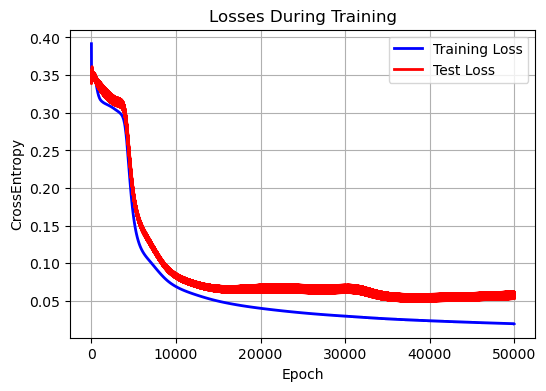

F-score on test set: 0.96


In [290]:
nn_xor=NeuralNetwork(layers=[2,16,num_classes], task="classification", 
                     activation="sigmoid", weights_initialize="Xavier")
nn_xor.train(X_train_xor_normalized, Y_train_xor, X_test_xor_normalized, Y_test_xor, optimizer="RMSprop", 
               learning_rate=0.01, epochs=50000, verbose_interval=5000, batch_size=None)

In [291]:
nn_xor.train(X_train_xor_normalized, Y_train_xor, X_test_xor_normalized, Y_test_xor, optimizer="RMSprop", 
               learning_rate=0.01, epochs=10000, verbose_interval=1000, batch_size=None, plot_training_loss=False)

Epoch 0, Training Loss: 0.019792, Test Loss: 0.062150
Epoch 1000, Training Loss: 0.019468, Test Loss: 0.062591
Epoch 2000, Training Loss: 0.019156, Test Loss: 0.062999
Epoch 3000, Training Loss: 0.018856, Test Loss: 0.063355
Epoch 4000, Training Loss: 0.018565, Test Loss: 0.063635
Epoch 5000, Training Loss: 0.018284, Test Loss: 0.063810
Epoch 6000, Training Loss: 0.018008, Test Loss: 0.063839
Epoch 7000, Training Loss: 0.017736, Test Loss: 0.063693
Epoch 8000, Training Loss: 0.017462, Test Loss: 0.063434
Epoch 9000, Training Loss: 0.017178, Test Loss: 0.063494
Total training time: 7.74 seconds
F-score on test set: 0.97


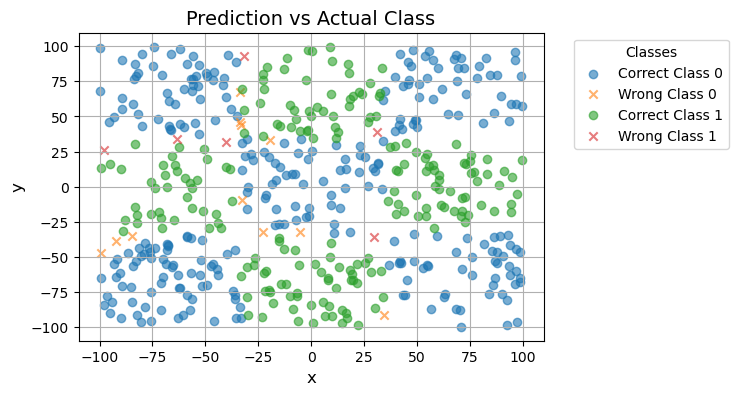

In [298]:
Y_pred = nn_xor.predict(X_test_xor_normalized)
visualize_predictions(X_test_xor, Y_test_xor, Y_pred, num_classes)

#### Testing different activation functions on last layer
on rings3 dataset

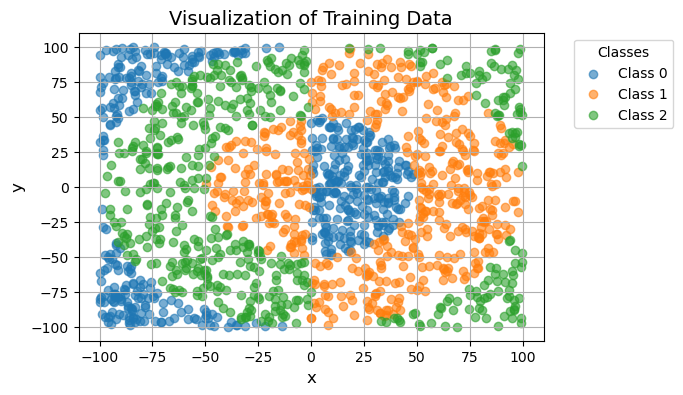

In [216]:
visualize_data_classification(X_train_rings, Y_train_rings, num_classes=num_classes)

In [ ]:
def visualize_multiple_predictions(X_test, Y_test, Y_pred_list, activation_names, num_classes, models):
    num_activations = len(activation_names)
    cols = 3
    rows = math.ceil(num_activations / cols)
    colors = sns.color_palette("tab10", num_classes)

    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
    axes = np.array(axes).flatten()

    if Y_test.shape[1] > 1:
        Y_test_class = np.argmax(Y_test, axis=1)
    else:
        Y_test_class = Y_test.flatten()

    for idx, (ax, Y_pred, activation_name, model) in enumerate(zip(axes, Y_pred_list, activation_names, models)):
        Y_pred_class = np.argmax(Y_pred, axis=1) if Y_pred.ndim > 1 else Y_pred.flatten()
        fscore = model.Fscore(X_test,Y_test)
        ax.set_title(f"Activation: {activation_name}\nF1-score: {fscore:.2f}", fontsize=12)

        x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
        y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                             np.linspace(y_min, y_max, 300))
        grid = np.c_[xx.ravel(), yy.ravel()]
        Z = model.predict(grid)
        Z = np.argmax(Z, axis=1) if Z.ndim > 1 else Z
        Z = Z.reshape(xx.shape)

        ax.contourf(xx, yy, Z, alpha=0.2, levels=np.arange(num_classes + 1) - 0.5,
                    colors=colors, linestyles='dotted')


        for class_label in range(num_classes):
            correct = X_test[(Y_test_class == class_label) & (Y_pred_class == class_label)]
            wrong = X_test[(Y_test_class == class_label) & (Y_pred_class != class_label)]

            ax.scatter(correct[:, 0], correct[:, 1], color=colors[class_label], alpha=0.6, marker='o', label=f"✓ {class_label}")
            ax.scatter(wrong[:, 0], wrong[:, 1], color='black', alpha=0.4, marker='x', label=f"✗ {class_label}")

        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.grid(True)
        ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)

    for idx in range(num_activations, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()


Training with last layer activation: softmax
Training with last layer activation: linear
Training with last layer activation: sigmoid
Training with last layer activation: tanh
Training with last layer activation: relu


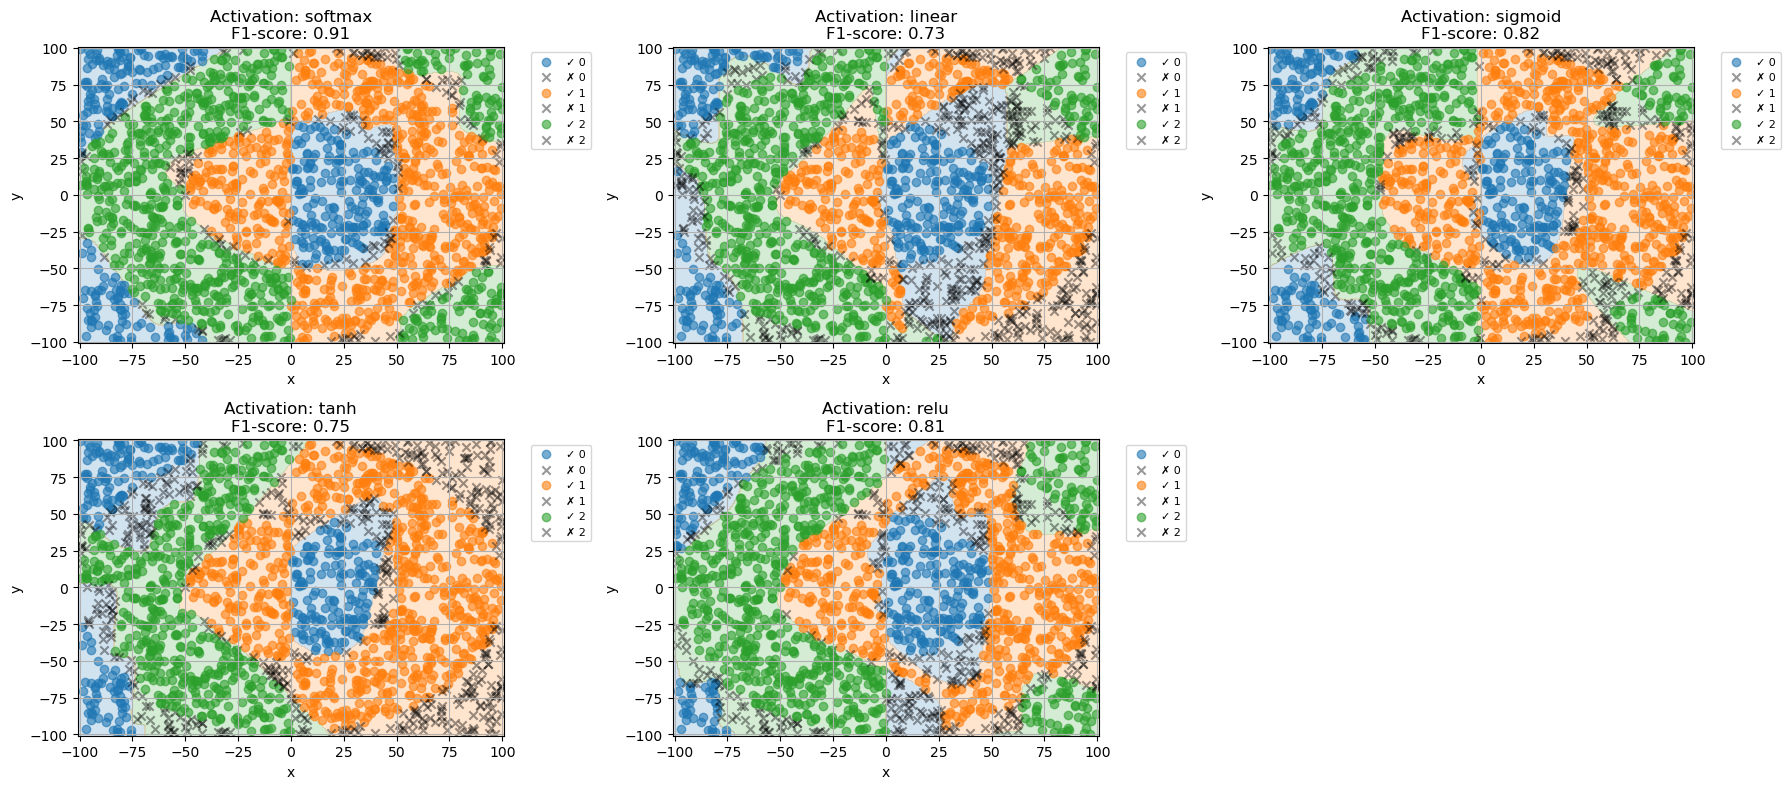

In [ ]:
activations = ["softmax", "linear", "sigmoid", "tanh", "relu"]
Y_pred = []
models = []

for activation in activations:
    nn = NeuralNetwork(layers=[2, 10, 3], task="classification", activation="sigmoid", 
                       weights_initialize="Xavier" , last_layer_activation=activation)
    print(f"Training with last layer activation: {activation}")
    
    nn.train(X_train_rings, Y_train_rings, X_test_rings, Y_test_rings, 
             optimizer="RMSprop", learning_rate=0.01, epochs=1000, 
             verbose=False, batch_size=32, plot_training_loss=False)

    models.append(nn)
    Y_pred.append(nn.predict(X_test_rings))


visualize_multiple_predictions(X_test_rings, Y_test_rings, Y_pred, activations, 3, models)


In [270]:
activations = ["softmax", "linear", "sigmoid", "tanh", "relu"]
models = []
training_stats = []

for activation in activations:
    nn = NeuralNetwork(layers=[2, 10, 3], task="classification", activation="sigmoid", 
                      weights_initialize="Xavier", last_layer_activation=activation)
    print(f"Training with last layer activation: {activation}")
    
    stats = nn.train(X_train_rings, Y_train_rings, X_test_rings, Y_test_rings, 
                    optimizer="RMSprop", learning_rate=0.001, epochs=1000, 
                    verbose=False, batch_size=32, plot_training_loss=False,
                    return_training_stats=True)
    
    models.append(nn)
    training_stats.append(stats)

Training with last layer activation: softmax
Training with last layer activation: linear
Training with last layer activation: sigmoid
Training with last layer activation: tanh
Training with last layer activation: relu


In [284]:
def plot_training_curves(training_stats, activation_names):
    plt.figure(figsize=(12, 8))
    
    colors = sns.color_palette("tab10", len(activations))
    
    for stats, name, color in zip(training_stats, activation_names, colors):
        plt.plot(stats['train_losses'], label=f'{name} (train)', color=color, linestyle='-')
    
    plt.title('Training Loss by Activation Function')
    plt.xlabel('Epoch')
    plt.ylabel('Cross-Entropy Loss')
    plt.yscale('log') 
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

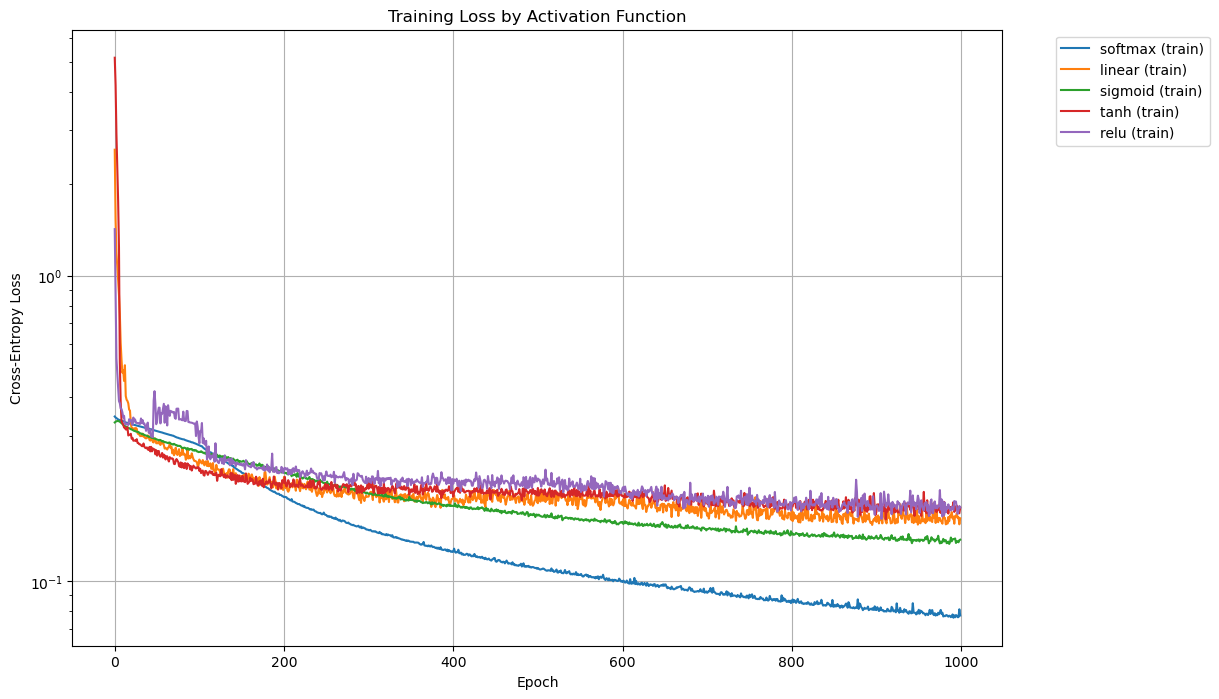

In [285]:
plot_training_curves(training_stats, activations)